In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/bhavya/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df = pd.read_csv("/home/bhavya/Downloads/datasets archive/toyproj/placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
# this is to display all data except 1st column name
df = df.iloc[:,1:]

In [5]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


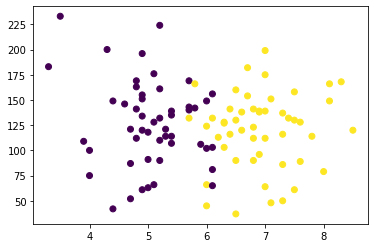

In [6]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])
# 'c' is for adding color to show whether placement = y/n
#yellow = y
#blue = n

In [7]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [8]:
Y.shape #1d tensor

(100,)

In [9]:
X.shape #2d tensor

(100, 2)

In [ ]:
#also print just X and Y individually
# X
# Y

In [10]:
# here independent variables like cgpa and iq are put into x and dependent variable like placement is put into y
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
# here test_size=0.1 means test data = 10% and train data =90%

In [11]:
x_test

,cgpa,iq
64,7.0,64.0
43,6.8,141.0
93,6.8,112.0
82,6.5,37.0
63,6.3,128.0
15,5.1,176.0
28,5.2,90.0
73,4.9,61.0
87,5.7,132.0
35,6.8,90.0


In [ ]:
y_test

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler  = StandardScaler()

In [14]:
x_train = scaler.fit_transform(x_train) #now this has been converted from dataframe to array

In [ ]:
#x_train
#this will print the array that x_train is now

In [15]:
x_test = scaler.transform(x_test)

In [ ]:
#x_test #will show scaled values

In [16]:
#calling logistic regression ka classifier from sklearn
from sklearn.linear_model import LogisticRegression

In [17]:
# clf = log reg. object
clf = LogisticRegression()

In [18]:
# model training step:
clf.fit(x_train, y_train)
# this fit func is used to train the model. we give it the training data which is x_train here

LogisticRegression()

In [19]:
# evaluation stage
y_pred = clf.predict(x_test)

In [20]:
#display actual result of whether students got placed or not
y_test

64    1
43    1
93    1
82    1
63    1
15    0
28    0
73    0
87    1
35    1
Name: placement, dtype: int64

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test, y_pred)

0.9

In [24]:
#!pip install mlxtend
#pip install mlxtend --upgrade --no-deps

In [26]:
# decision boundary is used for visualizing predicted pattern in data
from mlxtend.plotting import plot_decision_regions

<Axes: >

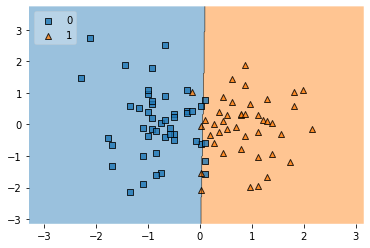

In [27]:
# y_train hasnt been converted to numpy array yet hence putting values function. 
#x_train is already np array sinc eit was put in standard scalar before.
# classifier clf is named clf
plot_decision_regions(x_train, y_train.values, clf = clf, legend = 2)

the line in the middle is the decision boundary.
now we will deploy this model (above line of code using pickle)
pickle converts objects in python into a file and this file can be used in any other env.

In [28]:
import pickle

In [29]:
pickle.dump(clf, open('model.pkl', 'wb'))
#clf is the object here
# model.pkl will be the ML model